In [1]:
# Public imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Private imports
from SNNs.Default_SNN import SNN
from Modelling.Training import Train_Model

In [3]:
def generate_synthetic_data(num_samples, input_size):
    X = np.random.rand(num_samples, input_size)
    y = np.random.randint(0, 2, num_samples)
    return X, y

X_train, y_train = generate_synthetic_data(100000, 784)


In [6]:
text = []
with open("Emotion_data/test.txt", 'r', encoding="utf-8") as test:
    for line in test:
        text.append(line)

# Tokenization
tokens = [t.split() for t in text]

# Flatten list of tokens and encode as integers
all_tokens = [token for sublist in tokens for token in sublist]
label_encoder = LabelEncoder()
label_encoder.fit(all_tokens)
encoded_texts = [label_encoder.transform(t.split()) for t in text]

def rate_code(data, max_rate=100, duration=100):
    normalized_data = data / np.max(data)

    return np.random.rand(len(data), duration) < (normalized_data[:, np.newaxis]) * max_rate / 1000.0
    # return np.random.rand(len(data), duration) < (data / np.max(data)) * max_rate / 1000.0

spike_trains = [rate_code(encoded_text) for encoded_text in encoded_texts]

In [2]:
texts = []
labels = []
with open("Emotion_data/test.txt", 'r', encoding="utf-8") as test:
    for line in test:
        separated = line.split(";")
        texts.append(separated[0])
        labels.append(separated[1].replace("\n", ""))

# print(f"length texts: {len(texts)}, texts examples: {texts}")
# print(f"length label: {len(labels)}, label example: {labels}")
# print(f"Unique values: {set(labels)}")



# vectorizer = CountVectorizer(lowercase=True, stop_words="english")
# X = vectorizer.fit_transform(texts).toarray()

# X_train, x_val, y_train, y_val = train_test_split(X, labels, test_size=0.2, random_state=42)



label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(labels)
X_train = np.random.rand(len(texts), 3014) # 3014


In [3]:
model = SNN(input_size=3014, hidden_size=100, output_size=10)
# print(f"X vals: {X_train} \nY vals: {y_train}")
Train_Model(model, X_train, y_train).train()
# Train_Model(model, encoded_texts, spike_trains).train()

/workspaces/Depression-in-SNN/SNNs/Morris_Lecar_Neuron.py:57: RuntimeWarning: overflow encountered in cosh
  return 1 / (self.phi * np.cosh((V - self.V3) / (2 * self.V4)))
/workspaces/Depression-in-SNN/SNNs/Morris_Lecar_Neuron.py:123: RuntimeWarning: divide by zero encountered in divide
  return (self.w_inf(V) - W) / self.tau_w(V)
/workspaces/Depression-in-SNN/SNNs/Morris_Lecar_Neuron.py:131: RuntimeWarning: invalid value encountered in add
  self.W = self.W + dt * self.dW(self.V, self.W)
/workspaces/Depression-in-SNN/SNNs/Morris_Lecar_Neuron.py:70: RuntimeWarning: invalid value encountered in multiply
  return self.gCa * self.m_inf(V) * (V - self.VCa)


Epoch 1/10, Loss: nan, Accuracy: 0.9969512195121951
Epoch 2/10, Loss: nan, Accuracy: 1.0
Epoch 3/10, Loss: nan, Accuracy: 1.0
Epoch 4/10, Loss: nan, Accuracy: 1.0
Epoch 5/10, Loss: nan, Accuracy: 1.0
Epoch 6/10, Loss: nan, Accuracy: 1.0
Epoch 7/10, Loss: nan, Accuracy: 1.0
Epoch 8/10, Loss: nan, Accuracy: 1.0
Epoch 9/10, Loss: nan, Accuracy: 1.0
Epoch 10/10, Loss: nan, Accuracy: 1.0


Unique values in Training Loss: {np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan)}


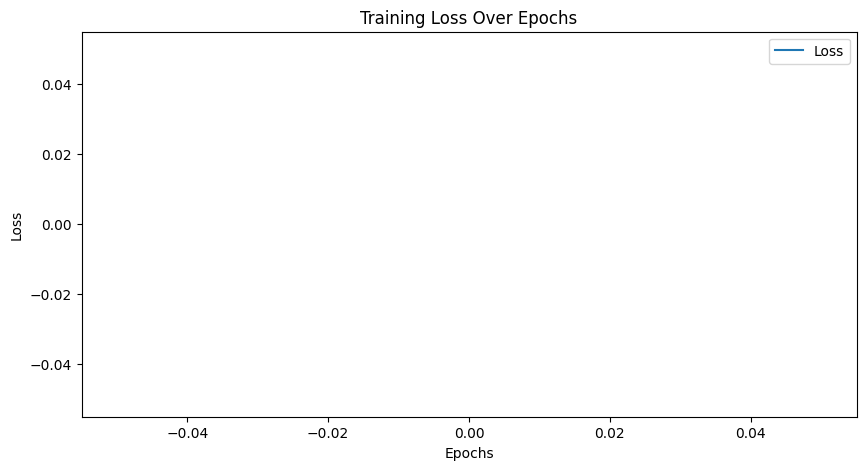

In [5]:
# Load recorded loss data
loss_history = np.load('Results/NormalSNN/loss_history.npy') 

print(f"Unique values in Training Loss: {set(loss_history)}")
epochs = np.arange(len(loss_history))
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_history, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

Unique values in Accuracy: {np.float64(0.9969512195121951), np.float64(1.0)}


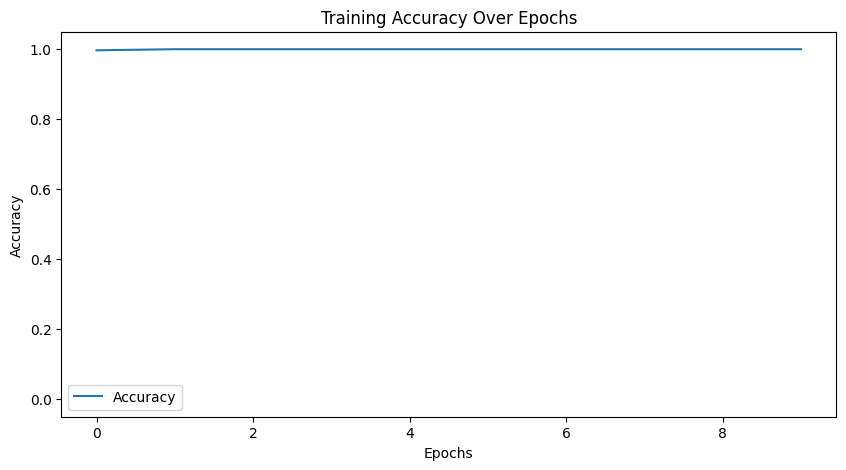

In [6]:
# Load recorded accuracy data
accuracy_history = np.load('Results/NormalSNN/accuracy_history.npy') 

print(f"Unique values in Accuracy: {set(accuracy_history)}")
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy_history, label='Accuracy')
plt.ylim(-0.05, 1.05)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()


In [6]:
# Load recorded spike activity data
spike_record = np.load('spike_record.npy') 

plt.figure(figsize=(10, 5))
plt.imshow(spike_record, cmap='binary', aspect='auto')
plt.title('Spike Activity')
plt.xlabel('Time')
plt.ylabel('Neuron Index')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'spike_record.npy'

In [ ]:
# Load recorded membrane potential data
membrane_potential = np.load('membrane_potential.npy') 

plt.figure(figsize=(10, 5))
plt.plot(membrane_potential)
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.title('Morris-Lecar Neuron Dynamics')
plt.show()
